# Clasificación multiclase softmax

La clasificación softmax es una generalización de la regresión logística binaria, donde en vez de dividir o separar mediante un valor delimitante se asignan valores de probabilidad mediante la 'normalización' de valores de salida o las clases mediante la funcion *softmax* o también conocido como *función exponencial normalizada*

Esta regresión es un es un algoritmo destinado clasificar los datos para más de 2 clases. En realidad, es una generalización de lo que se usa en la regresión logística binaria, como se verá a continuación

La gran diferencia entre la regresión binaria es que es necesario una cierta normalización los datos tanto de entrada como de salida, por lo que se requiere 2 pasos para poder llevar a cabo una transformación de los datos de tal forma que se cumpla con el ajuste analizado anteriormente del descenso del gradiente.

Al normalizar los valores de entrada y de salida, se obtienen probabilidades de los cuales al sumarlas se obtiene un total de uno, es decir, es una distribución de probabilidades.

No hay mucha diferencia en la parte práctica comparado con la regresión logística binaria, pues hay que tener cuidado de cómo presentar al algoritmo la salida o las clases de las cuales se van a clasificar. Tal como se explica en las imágenes siguientes, el cual es simplemente intercambiar la función sigmoide por la función softmax, que, por fin es prácticos, en esa libreta, se llamarán de esta manera.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
import logging

logging.basicConfig(level=logging.INFO)
logging.disable()

## Desarrollo de teoria

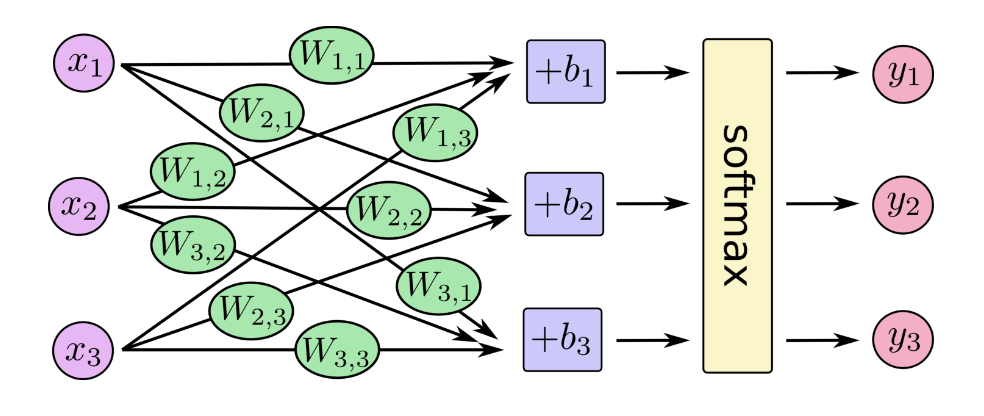

La imagen anterior se puede observar un comportamiento esperado de una función matricial de datos, el cual las operaciones aplicadas sobre los pesos o características esenciales de la base de datos forman parte de la toma de decisiones en la clasificación. Se agrega entonces la operación sigmoide o softmax para normalizar y preparar la regresión aplicable en probabilidades de cero a uno, lo que nosotros conocemos como los o la matriz theta.

Al decir que las operaciones son similares quiere decir que la transformación matricial compone de una misma sintaxis comparado con la regresión logística binaria, es preparar la entrada y la salida de datos.

El único inconveniente encontrado es la necesidad de transformar la salida de una forma nominal, es decir, responder a la siguiente pregunta: ¿es o no la clase uno, o la clase dos, etcétera?

Deben cumplir con la siguientes condiciones.

Desarrollo de la función softmax como:

$$

P(y=j \mid z^{(i)}) = \phi(z^{(i)}) = \frac{e^{z^{(i)}}}{\sum_{j=1}^{k} e^{z_{j}^{(i)}}}

$$

Donde los dados Z como:

$$
z = w_1x_1 + ... + w_mx_m  + b= \sum_{l=1}^{m} w_l x_l + b= \mathbf{w}^T\mathbf{x} + b
$$

O de forma simplficada

$$
\mathbf{Z} = \mathbf{X}\mathbf{W} + \mathbf{b}
$$

En muchas ocasiones se omitirá la b. 

Este algoritmo es directamente aplicable con el descenso de gradiente.

### Ventajas y desventajas

Ventajas:
- Este algoritmo al ser extensión la regresión logística binaria la programación se modifica únicamente sustituyendo la función sigmoide por softmax.

- Requiere pocos pasos comparado con las versiones anteriores de clasificación one vs all y one vs one.

- Al igual, su preparación de datos es igual de reducida.

Desventajas
- La aplicación del descenso del gradiente resulta afectarle demasiado dando como resultado una baja eficiencia de datos finales de predicción.

- Es muy sencillo en el sentido de que se observan pocas características en la base de datos reducir a los posibles resultados con una precisión mayor.

## Funciones de preparacion de datos y entrenamiento

Es algoritmo transforma los datos de salida de una forma nominal, es decir, en extender las clases el número de columnas y decir si la columna uno verdadero en caso de pertenecer a la clase uno y dejar como cero el resto de clases posibles.

In [2]:
def one_hot_encoder(target: np.ndarray) -> np.ndarray:
    n_classes: int = np.unique(target).shape[0]
    y_encode: np.ndarray = np.zeros((target.shape[0], n_classes))
    for idx, val in enumerate(target):
        y_encode[idx, val] = 1.0
    return y_encode

Función softmax

In [3]:
def softmax(z: np.ndarray) -> np.ndarray:
    return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

Función de entrenamiento

In [4]:
def model_fit(
    data: np.ndarray, target: np.ndarray, eta: float = 0.55, iterations: int = 100000
) -> np.ndarray:
    m = len(target)
    logging.info(f"target: {m}")

    theta = np.random.randn(data.shape[1], target.shape[1])

    logging.info(f"theta: {theta}")

    for _ in range(iterations):
        gradients = (1 / m) * (data.T @ (softmax(data @ theta) - target))
        theta = theta - eta * gradients

    logging.info(f"theta: {theta}")

    return theta

Funciones y métodos de prueba

In [5]:
def model_test(
    sepal_length: float,
    sepal_width: float,
    petal_length: float,
    petal_width: float,
    weights: np.ndarray,
) -> list[int]:
    list1 = [0, 0, 0]

    for i in range(len(list1)):
        a0 = weights.T[i][0]
        a1 = weights.T[i][1]
        a2 = weights.T[i][2]
        a3 = weights.T[i][3]
        a4 = weights.T[i][4]
        list1[i] = np.exp(
            a0 + a1 * sepal_length + a2 * sepal_width + a3 * petal_length + a4 * petal_width
        )

    maxP = np.argmax([z / sum(list1) for z in list1])

    pred = [0, 0, 0]

    pred[maxP] = 1

    return pred


In [6]:
def model_predict(
    data: np.ndarray, target: np.ndarray, weights: np.ndarray
) -> tuple[np.ndarray, float]:
    predict_list = []
    test_list = []
    for i in data:
        predict_list.append(np.argmax(model_test(i[0], i[1], i[2], i[3], weights)))
    for j in target:
        test_list.append(np.argmax(j))
    num = 0
    for k in range(len(predict_list)):
        if predict_list[k] == test_list[k]:
            num = num + 1

    final_list: np.ndarray = np.array([predict_list, test_list], ndmin=2)
    effi = num / len(predict_list)

    return final_list, effi

## Base de datos: Iris

In [7]:
iris: Bunch = datasets.load_iris()  # type: ignore

x_data: np.ndarray = iris["data"]  # type: ignore
y_data: np.ndarray = iris["target"]  # type: ignore

x_c: np.ndarray = np.c_[np.ones((len(x_data), 1)), x_data]
y_c = one_hot_encoder(y_data)

## Preparación de datos, división en split

In [8]:
train_test_data: list[np.ndarray] = train_test_split(x_c, y_c, train_size=0.35)  # type: ignore
x_train, x_test, y_train, y_test = train_test_data

logging.info(f"x_train shape: {x_train.shape}")
logging.info(f"x_test shape: {x_test.shape}")
logging.info(f"y_train shape: {y_train.shape}")
logging.info(f"y_test shape: {y_test.shape}")

INFO:root:x_train shape: (52, 5)
INFO:root:x_test shape: (98, 5)
INFO:root:y_train shape: (52, 3)
INFO:root:y_test shape: (98, 3)


## Entrenamiento

In [9]:
a = model_fit(x_train, y_train)

INFO:root:target: 52
INFO:root:theta: [[-1.55241902  1.10534327  0.74191656]
 [-1.15890753  1.7237818   1.67262934]
 [-1.64612977  1.6201928  -0.40410072]
 [ 1.82680202 -0.04420014  0.54289874]
 [ 2.75083936  0.97545994 -0.69053596]]
INFO:root:theta: [[  1.49074787   9.98537227 -11.18127934]
 [  6.5192695    2.48363099  -6.76539688]
 [ 11.9723874    7.64016182 -20.0425869 ]
 [-14.07058844  -3.98204881  20.37813787]
 [ -6.51752786  -7.49534475  17.04863595]]


## Prediccón

In [11]:
predictions, efficiency = model_predict(x_test, y_test, a)

print(f"Predictions: {predictions}")
print(f"Efficiency: {efficiency}")

Predictions: [[0 1 1 1 0 1 2 0 2 1 0 0 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 0 0 1 1
  1 1 1 0 1 2 1 1 1 0 1 1 2 1 1 0 1 1 1 2 0 1 2 1 1 1 0 0 1 2 1 0 1 2 0 1
  1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1]
 [1 1 1 0 2 0 1 2 2 0 1 2 1 0 2 2 1 1 0 1 0 2 1 0 1 2 2 2 0 1 1 1 2 2 1 1
  1 0 1 1 0 2 0 2 1 2 0 1 2 1 0 2 0 0 1 2 2 0 2 0 1 1 2 1 2 2 2 1 1 2 1 1
  0 1 2 0 1 2 2 0 0 2 2 1 1 2 1 0 0 0 2 0 0 2 0 0 0 1]]
Efficiency: 0.4387755102040816
